### Learning to make a tensorflow dataset

In [1]:
# # creating tfrecord file

# import tensorflow as tf
# import os
# from matplotlib.image import imread

# # Define the paths to your image folders
# folder_paths = {
#     'Bhaktapur-Durbar-Square': '/Users/nirajanpaudel17/Documents/Python/Major-Project/Image-Processing/Dataset/Bhaktapur-Durbar-Square',
#     'Bouddanath': '/Users/nirajanpaudel17/Documents/Python/Major-Project/Image-Processing/Dataset/Bouddanath',
#     'Pashupatinath': '/Users/nirajanpaudel17/Documents/Python/Major-Project/Image-Processing/Dataset/Pashupatinath',
#     'Patan-Durbar-Square': '/Users/nirajanpaudel17/Documents/Python/Major-Project/Image-Processing/Dataset/Patan-Durbar-Square',
#     'Swyambunath': '/Users/nirajanpaudel17/Documents/Python/Major-Project/Image-Processing/Dataset/Swyambunath'
# }

# class_mapping = {
#     'Bhaktapur-Durbar-Square': 0,
#     'Bouddanath': 1,
#     'Pashupatinath': 2,
#     'Patan-Durbar-Square': 3,
#     'Swyambunath': 4
# }

# # Define the output TFRecord file name
# output_directory = '/Users/nirajanpaudel17/Documents/Python/Major-Project'
# output_filename = os.path.join(output_directory, 'labeled_temples_images.tfrecord')

# # Initialize an empty list to store the labeled images
# labeled_images = []

# # Iterate over each class folder
# for class_name, folder_path in folder_paths.items():
    
#     # Get the list of image filenames in the current class folder
#     image_filenames = os.listdir(folder_path)
    
#     class_label = class_mapping[class_name]
    

#     # Iterate over each image in the class folder
#     for image_filename in image_filenames:
#         # Create the full path to the image file
#         image_path = os.path.join(folder_path, image_filename)

#         try:
#             # Read the image file
#             image = tf.io.read_file(image_path)

#             # Decode the image file
#             image = tf.io.decode_jpeg(image)
            
#             image = tf.io.encode_jpeg(image).numpy()


#             # Create a labeled example
#             example = tf.train.Example(features=tf.train.Features(feature={
#                 'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image])),
#                 'class': tf.train.Feature(int64_list=tf.train.Int64List(value=[class_label]))
#             }))

#             # Append the labeled example to the list
#             labeled_images.append(example)

#         except tf.errors.InvalidArgumentError:
#             print('Skipping unsupported image:', image_path)

# # Create a writer for the TFRecord file
# with tf.io.TFRecordWriter(output_filename) as writer:
#     # Write each labeled example to the TFRecord file
#     for example in labeled_images:
#         writer.write(example.SerializeToString())

# # # Print the number of labeled images
# print('Number of labeled images:', len(labeled_images))


# # reading a tfrecord file

# import tensorflow as tf


# def parse_tfrecord_fn(example_proto):
#     feature_description = {
#         'image': tf.io.FixedLenFeature([], tf.string),
#         'class': tf.io.FixedLenFeature([], tf.int64),
#     }
#     example = tf.io.parse_single_example(example_proto, feature_description)
    
#     image = tf.image.decode_jpeg(example['image'], channels=3)  # Modify the decoding function as per image format
#     image = tf.cast(image, tf.float32) / 255.0
    
# #     label = tf.cast(example['class'], tf.string)
#     label = example['class']
    
#     return image, label


# # Specify the path to the TFRecord file(s)
# tfrecord_files = ['/Users/nirajanpaudel17/Documents/Python/Major-Project/labeled_temples_images.tfrecord']

# # Create a TFRecordDataset
# dataset = tf.data.TFRecordDataset(tfrecord_files)

# # dataset_size = tf.data.experimental.cardinality(dataset).numpy()
# # print("Dataset size:", dataset_size)

# # Apply parsing function to the dataset
# dataset = dataset.map(parse_tfrecord_fn)

# # Print the first few examples in the dataset
# for image, label in dataset.take(1):
#     # Process or use the image and label as needed
#     print(image.shape, label)


# #extracting images and labels from tfrecord

# images_to_train = []
# labels_of_train = []

# for image, label in train_dataset:
    
#     images_to_train.append(image)
#     labels_of_train.append(label)
    
# images_to_test = []
# labels_of_test = []

# for image, label in test_dataset:
    
#     images_to_test.append(image)
#     labels_of_test.append(label)

In [2]:
import os

In [4]:
# creating train and test dataset

import os
import random
import shutil


source_folder = '/Users/nirajanpaudel17/Documents/Python/Major-Project/Web-Scrapping/images'
destination_folder = '/Users/nirajanpaudel17/Documents/Python/Major-Project/Temple-Classification/dataset'

train_ratio = 0.7  # 70% for training, 30% for testing

for category_folder in os.listdir(source_folder):
    category_path = os.path.join(source_folder, category_folder)
    if not os.path.isdir(category_path):
        continue  # Skip non-directory files
    
    # Create corresponding folders in the destination folder
    train_category_path = os.path.join(destination_folder, 'train', category_folder)
    test_category_path = os.path.join(destination_folder, 'test', category_folder)
    os.makedirs(train_category_path, exist_ok=True)
    os.makedirs(test_category_path, exist_ok=True)
    
    # Collect image file paths in the current category
    image_files = [f for f in os.listdir(category_path) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Randomly shuffle the image file paths

    random.shuffle(image_files)
    
    # Determine the split index based on the train_ratio
    split_index = int(len(image_files) * train_ratio)
    
    # Move images to the train or test folder based on the split index
    for i, image_file in enumerate(image_files):
        source_path = os.path.join(category_path, image_file)
        if i < split_index:
            destination_path = os.path.join(train_category_path, image_file)
        else:
            destination_path = os.path.join(test_category_path, image_file)
        
        # Move the image file
        shutil.move(source_path, destination_path)


In [5]:
data_dir = destination_folder

In [7]:
os.listdir(data_dir)

['test', 'train']

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread

In [9]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [10]:
os.listdir(train_path)

['Pashupatinath',
 'Bouddanath',
 'Swyambunath',
 'Patan-Durbar-Square',
 'Bhaktapur-Durbar-Square']

In [15]:
# os.listdir(test_path+'Pashupatinath/')

(384, 512, 3)


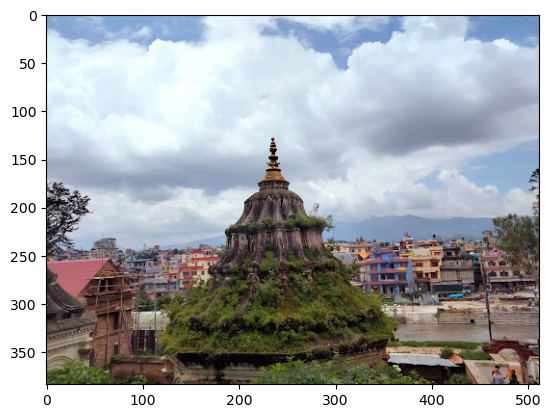

In [20]:
test_image = test_path+'Pashupatinath/'+'image63.jpg'
test_image = imread(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [21]:
dim1 = []
dim2 = []

for image_file in os.listdir(train_path+'Pashupatinath'):
    img = imread(train_path+'Pashupatinath/'+image_file)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

<Axes: >

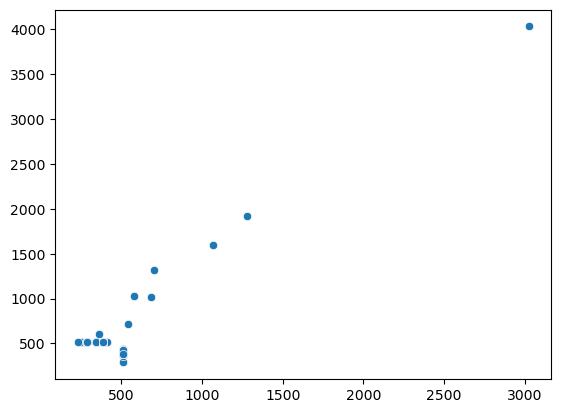

In [23]:
sns.scatterplot(x=dim1,y=dim2)

# printing the dimensions of the images

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rescale=1/255,
                              fill_mode='nearest')


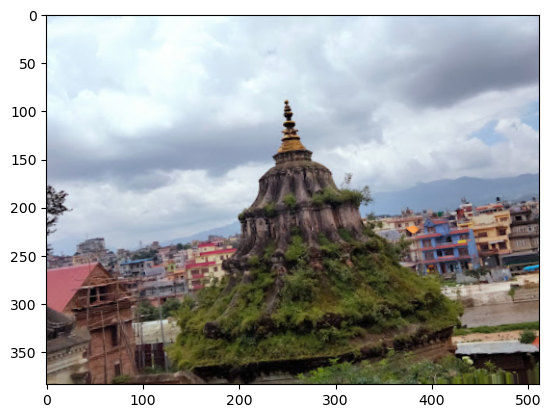

In [32]:
plt.imshow(image_gen.random_transform(test_image))

In [57]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense
from tensorflow.keras.models import Model

In [64]:
def custom_preprocessing(img):
    img = preprocess_input(img)  # preprocessing function for resnet50
    return img

image_gen.preprocessing_function = custom_preprocessing

train_generator = image_gen.flow_from_directory(directory=train_path,
                                               target_size=(224,224),batch_size=32,class_mode='categorical',
                                                keep_aspect_ratio=False)

Found 1144 images belonging to 5 classes.


In [65]:
n_classes = 5

base_model = ResNet50(weights="imagenet",include_top=False)
avg = GlobalAveragePooling2D()(base_model.output)
output = Dense(n_classes, activation="softmax")(avg)
model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers: 
    layer.trainable = False

In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,epochs=5,steps_per_epoch=len(train_generator))


Epoch 1/5


2023-07-27 16:02:40.822469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 13s 335ms/step - loss: 1.5203 - accuracy: 0.3339
Epoch 2/5
36/36 [==============================] - 12s 331ms/step - loss: 1.5051 - accuracy: 0.3505
Epoch 3/5
36/36 [==============================] - 12s 330ms/step - loss: 1.4939 - accuracy: 0.3706
Epoch 4/5
36/36 [==============================] - 12s 335ms/step - loss: 1.4662 - accuracy: 0.3610
Epoch 5/5
36/36 [==============================] - 12s 332ms/step - loss: 1.4744 - accuracy: 0.3715


In [68]:
for layer in base_model.layers: 
    layer.trainable = True

In [69]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,epochs=5,steps_per_epoch=len(train_generator))

Epoch 1/5


2023-07-27 16:05:42.003413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 52s 1s/step - loss: 1.7240 - accuracy: 0.6058
Epoch 2/5
36/36 [==============================] - 42s 1s/step - loss: 1.1332 - accuracy: 0.6897
Epoch 3/5
36/36 [==============================] - 41s 1s/step - loss: 0.6272 - accuracy: 0.7858
Epoch 4/5
36/36 [==============================] - 42s 1s/step - loss: 0.4609 - accuracy: 0.8453
Epoch 5/5
36/36 [==============================] - 42s 1s/step - loss: 0.3486 - accuracy: 0.8811
